In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:

data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)

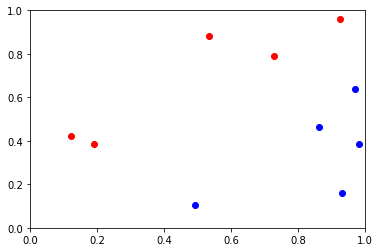

In [23]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)

In [55]:
from sklearn.linear_model import LogisticRegression


data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
print(X[2,0])

clf = LogisticRegression().fit(X,Y)

0.7247263375400528


C:\Users\prem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ 1.  1. -1.  1.  1. -1. -1. -1. -1.  1.]


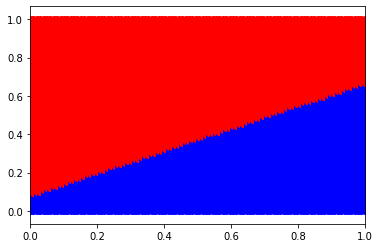

In [60]:
pred_ytrain=clf.predict(X)
print(pred_ytrain)

X1space = np.linspace(0, 1, 100)
X2space = np.linspace(0, 1, 100)

  # Creating the array of testing points 
Xtest = []
for i in range(100):
    X1space = np.linspace(0, 1, 100)
    X2space = np.linspace(0, 1, 100)

  # Creating the array of testing points 
Xtest = []
for i in range(100):
    for j in range(100):        
        Xtest.append([X1space[i],X2space[j]])
Xtest = np.asarray(Xtest)
    

pred_ytrain=clf.predict(Xtest)
plt.xlim(0,1)
for i in range(len(pred_ytrain)):
    if(pred_ytrain[i]==1):
        clr='red'
    if(pred_ytrain[i]==-1):
        clr='blue'
    plt.scatter(Xtest[i,0],Xtest[i,1],c=clr)

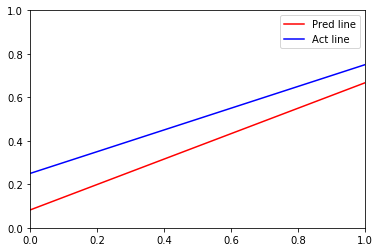

In [59]:
x_points = np.linspace(0,1,1000)

# Defining and plotting the predicted line 
y_pred = -(clf.coef_[0][0]*x_points + clf.intercept_[0])/clf.coef_[0][1]
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(x_points, y_pred,'-r', label = 'Pred line')


y_act = (0.5*x_points + 0.25)
plt.plot(x_points, y_act, '-b', label = 'Act line')
plt.legend()

In [53]:
def svm_function(x, y, epoch, l_rate):

    # Appending a fixed bias of +1 to all the datapoints
    list_X = x.tolist()
    for i in range(len(x)):
      list_X[i].append(1)
    x = np.asarray(list_X)
    
    # Initializing the weight vector with zeros 
    w = np.zeros(len(x[0]))
    print(w.shape,x[1].shape)

    # Updating the weight vector 
    for val in range(1,epoch):
        for i, point in enumerate(x):
            if (y[i]*np.dot(x[i], w)) < 1:
                w = w + l_rate * ((x[i]*y[i]) + (-2*(1/epoch)* w))
            else:
                w = w + l_rate * (-2*(1/epoch)* w)
    return w

In [54]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)

(3,) (3,)


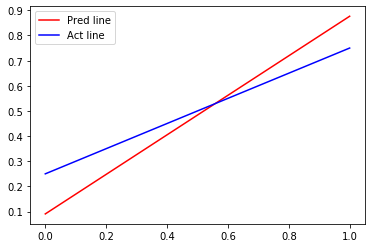

In [26]:

x_points = np.linspace(0,1,1000)

 
y_pred = (-w[0]*x_points - w[2])/w[1]
plt.plot(x_points, y_pred,'-r', label = 'Pred line')

# Defining and plotting the actual line 
y_act = (0.5*x_points + 0.25)
plt.plot(x_points, y_act, '-b', label = 'Act line')
plt.legend()

In [27]:

# Creating a dataset with 100 datapoints
large_data = [[np.random.rand(), np.random.rand()] for i in range(100)]
for i, point in enumerate(large_data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    large_data[i].append(-1)
  else:
    large_data[i].append(1)

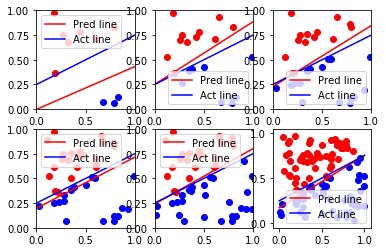

In [28]:
# Defining the number of datapoints 
data_points = [10, 20, 30, 40, 50, 100]
epochs = 10000
l_rate = 1

# Classifying the datapoints
for i,point in enumerate(data_points):
  my_data = large_data[:point]
  my_data = np.asarray(my_data)
  X = my_data[:,:2]
  Y = my_data[:,2]
  w= svm_function(X, Y, epochs, l_rate)
  x_points = np.linspace(0,1)
  plt.xlim(0,1)
  plt.ylim(0,1)

  # Plotting the subplots for different number of datapoints 
  plt.subplot(2, 3, (i+1))
  plt.plot(x_points, (-w[0]*x_points - w[2])/w[1],'-r', label = 'Pred line')
  plt.plot(x_points, (0.5*x_points + 0.25), '-b', label = 'Act line')
  for x, y, l in my_data:
    if l == 1: 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.legend()

In [29]:
for i in range(len(data)):
  data[i][0] += (np.random.rand() - 0.5) / 2.
  data[i][1] += (np.random.rand() - 0.5) / 2.

In [30]:

# Creating a dataset with 100 datapoints
large_noisy_data = [[np.random.rand(), np.random.rand()] for i in range(100)]

# Adding noise to the above data 
for i in range(len(large_data)):
  large_noisy_data[i][0] += (np.random.rand() - 0.5) / 2.
  large_noisy_data[i][1] += (np.random.rand() - 0.5) / 2.

for i, point in enumerate(large_noisy_data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    large_noisy_data[i].append(-1)
  else:
    large_noisy_data[i].append(1)

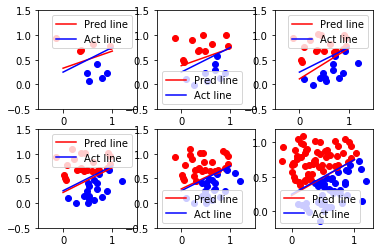

In [31]:
# Defining the number of datapoints 
data_points = [10, 20, 30, 40, 50, 100]
epochs = 10000
l_rate = 1

# Classifying the datapoints
for i,point in enumerate(data_points):
  my_noisy_data = large_noisy_data[:point]
  my_noisy_data = np.asarray(my_noisy_data)
  X = my_noisy_data[:,:2]
  Y = my_noisy_data[:,2]
  w = svm_function(X, Y, epochs, l_rate)
  x_points = np.linspace(0,1)
  plt.xlim(-0.5,1.5)
  plt.ylim(-0.5,1.5)

  # Plotting the subplots for different number of datapoints 
  plt.subplot(2, 3, (i+1))
  plt.plot(x_points, (-w[0]*x_points - w[2])/w[1],'-r', label = 'Pred line')
  plt.plot(x_points, (0.5*x_points + 0.25), '-b', label = 'Act line')
  for x, y, l in my_noisy_data:
    if l == 1: 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.legend()

In [32]:
'''
################################################
### Write your code here (read data) ###########
################################################
import csv
with open('csv1.csv', 'r') as f:
  values_csv1 = list(csv.reader(f, delimiter=','))

################################################
### Write your code here (visualization) #######
################################################
for x, y, l in values_csv1:
    if (int(l) == 1): 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(float(x), float(y), c=clr)
    
    '''

"\n################################################\n### Write your code here (read data) ###########\n################################################\nimport csv\nwith open('csv1.csv', 'r') as f:\n  values_csv1 = list(csv.reader(f, delimiter=','))\n\n################################################\n### Write your code here (visualization) #######\n################################################\nfor x, y, l in values_csv1:\n    if (int(l) == 1): \n      clr = 'red'\n    else: \n      clr = 'blue'\n    plt.scatter(float(x), float(y), c=clr)\n    \n    "

In [61]:
################################################
### Write your code here for features ##########
################################################

X1=X[:,0]
X2=X[:,1]


def mapping(X1, X2):    
  x = np.c_[(X1, X2)]
  #x_1 = x[:,0]**2        
  #x_2 = np.sqrt(2)*x[:,0]*x[:,1]        
  #x_3 = x[:,1]**2
  features_x = np.array([X1, X2])
  return features_x

features_x = mapping(X1, X2)


# Calling the previously defined SVM function 
w =  svm_function(features_x.T, Y, 10000, 1) 
print(w)

(3,) (3,)
[-8.22635358 19.68408342 -4.55992587]


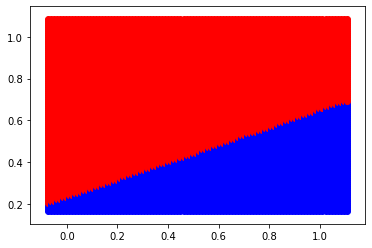

In [62]:
# Defining a function for visualizing the decision boundary 
def vis_dec_bnd():
   
  X1space = np.linspace(np.min(X1), np.max(X1), 100)
  X2space = np.linspace(np.min(X2), np.max(X2), 100)

 
  Xtest = []
  for i in range(100):
    for j in range(100):        
      Xtest.append([X1space[i],X2space[j]])
  Xtest = np.asarray(Xtest)

  
  features_x = mapping(Xtest[:,0], Xtest[:,1]).T

  # Adding a column of all ones to match with the dimension of weight vector  
  features_x = np.c_[features_x,np.ones(len(features_x))]

  # Classifying the points with trained SVM function 
  for i in range(len(features_x)):
    if np.dot(features_x[i], w) > 0:
      plt.scatter(Xtest[i,0], Xtest[i,1], c = "r")
    else:
      plt.scatter(Xtest[i,0], Xtest[i,1], c = "b")
  return None


vis_dec_bnd()

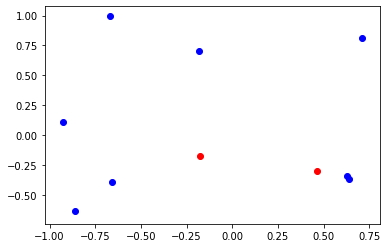

In [63]:

import csv
with open('https://raw.githubusercontent.com/premssr/SVM-nonlinear-dataset/master/Csv1.csv.csv', 'r') as f:
  values_csv2 = list(csv.reader(f, delimiter=','))


for x, y, l in values_csv2:
    if (int(l) == 1): 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(float(x), float(y), c=clr)

[ 0.02791866 -1.91434474  0.02791866 -6.60666353 -1.91434474  4.52569157]


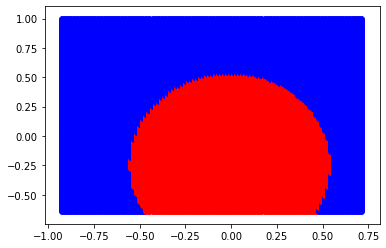

In [41]:

X = []
Y = []

for row in values_csv2:
  X.append(row[:-1])
  Y.append(row[-1])

X = np.array(X).astype('float64')
Y = np.array(Y).astype('float64')

X1 = X[:,0]
X2 = X[:,1]

def mapping(X1, X2):    
  x = np.c_[(X1, X2)]
  x_1 = x[:,0]        
  x_2 = pow(x[:,0], 2)/0.4 + pow(x[:,1], 2)/0.8        
  x_3 = x[:,1]
  features_x = np.array([X1, X2, x_1, x_2, x_3])
  return features_x

features_x = mapping(X1, X2)

 
w = svm_function(features_x.T, Y, 10000, 1) 
print(w)


vis_dec_bnd()